#Importing the Libraries

In [ ]:
#import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

**Mount the google drive**

In [ ]:
#Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Upload the Dataset**

In [ ]:
#File path of Airbnb dataset in google drive
#file_path = "/content/drive/My Drive/MY DAD PROJECTS/"
#df = pd.read_csv(file_path + "Airbnb NYC 2019.csv")
df = pd.read_csv('/content/drive/MyDrive/MY DAD PROJECTS/AB_NYC_2019.csv')

**Showing the Datset Information**

In [ ]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Showing the Sum of the Null values in this Datset

In [ ]:
#Sum of null values in dataset
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


**Dropping the null values**

In [ ]:
airbnb_df = df.dropna()

In [ ]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df = df.dropna(subset=['name', 'host_name'])

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


#**Average** preferred price by customers according to the location?

In [ ]:
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


**plot the graph**

In [ ]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

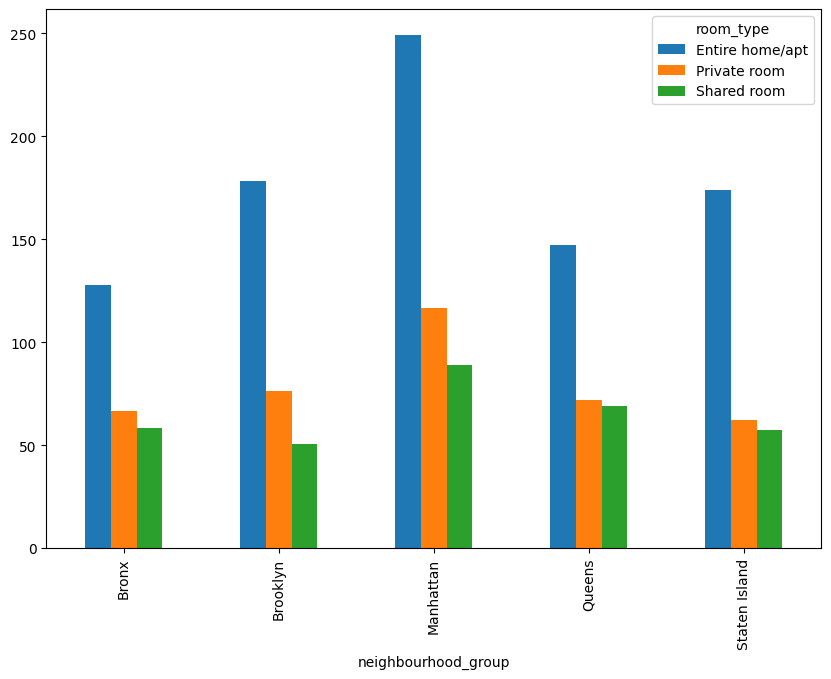

In [ ]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

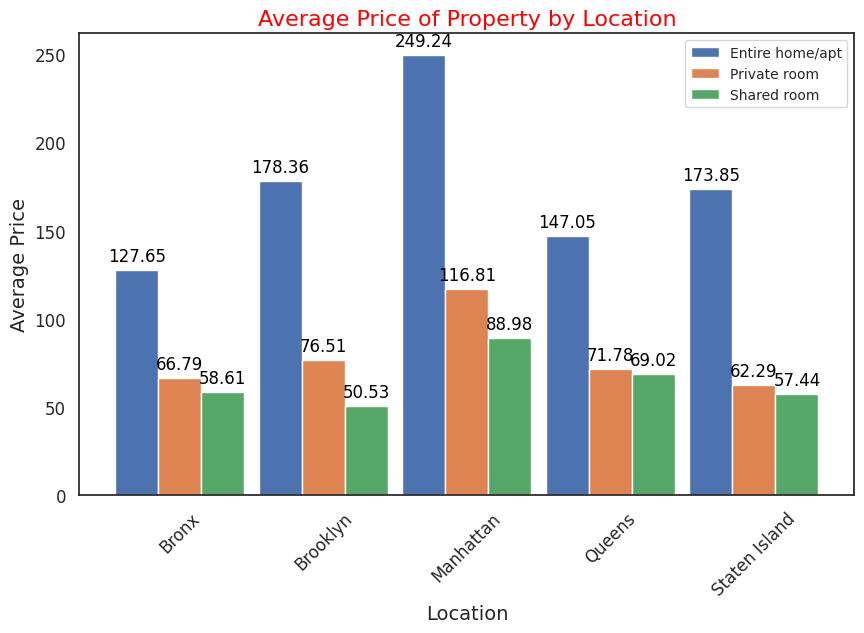

In [ ]:
import matplotlib.pyplot as plt

# Assuming avg_preffered_price_df is your DataFrame containing average prices per location
# Create the bar plot with increased bar width
ax = avg_preffered_price_df.plot.bar(figsize=(10, 6), width=0.9)  # Increase width (default is 0.8)

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.title('Average Price of Property by Location', fontsize=16, color='red')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the legend (if applicable)
plt.legend(fontsize=10)  # Decrease the legend font size

plt.show()


**plot the pie chart**

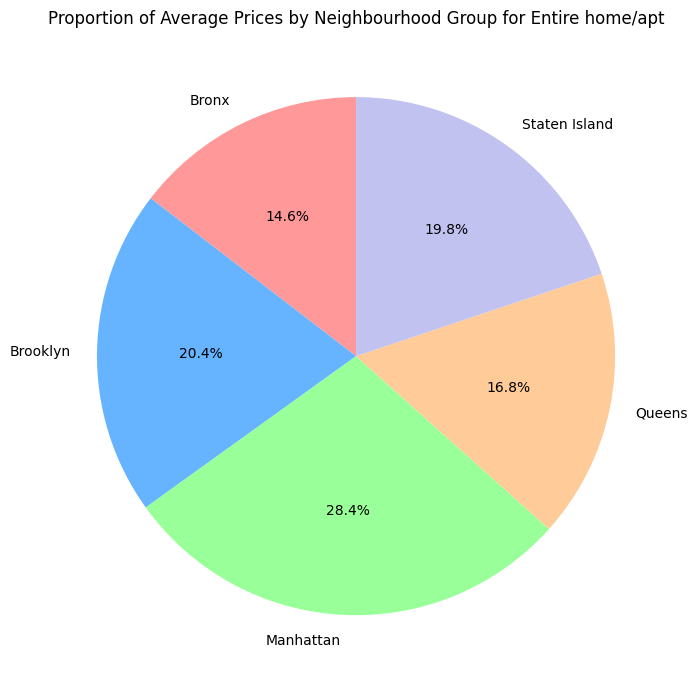

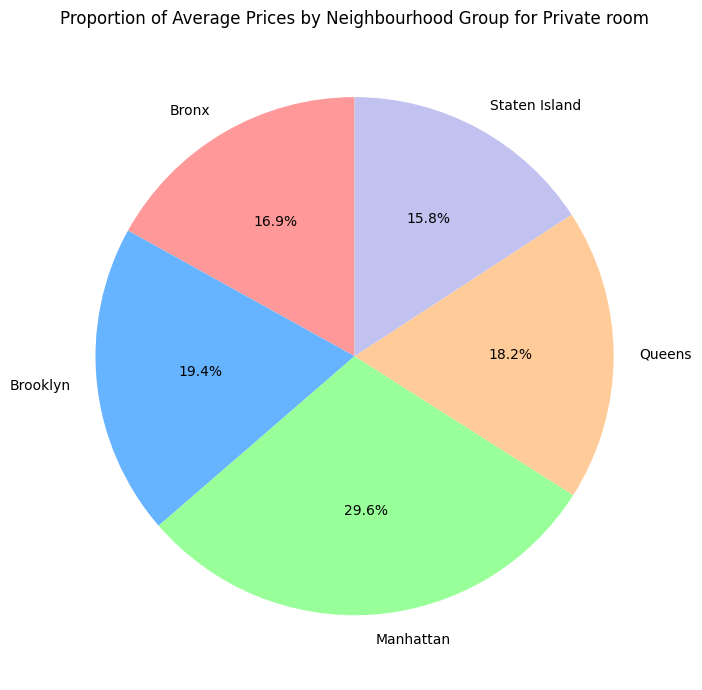

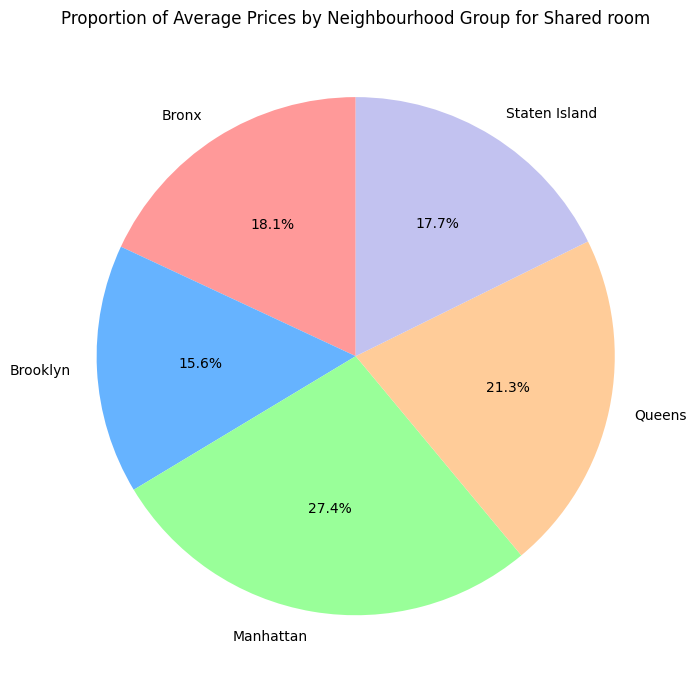

In [ ]:
import matplotlib.pyplot as plt

# Assuming `airbnb_df` is your DataFrame with 'neighbourhood_group', 'room_type', and 'price' columns

# Grouping the data and calculating the mean price
avg_preferred_price_df = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

# Define a color palette (adjust as needed)
color_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Creating a pie chart for each room type
for room_type in avg_preferred_price_df.columns:
    avg_preferred_price_df[room_type].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        title=f'Proportion of Average Prices by Neighbourhood Group for {room_type}',
        ylabel='',  # Removes the default y-label
        colors=color_palette[:len(avg_preferred_price_df)]  # Ensure the number of colors matches the sections
    )
    plt.tight_layout()
    plt.show()


**Finding Relation between neighbourhood group and availability of rooms**

<ipython-input-22-92c077aba026>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')
<ipython-input-22-92c077aba026>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size = '15')


[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

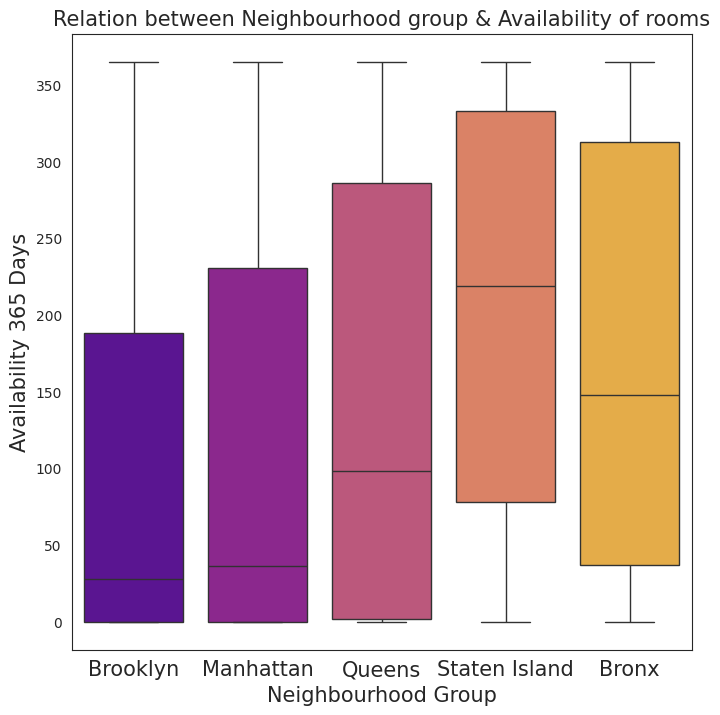

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style('white')

ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

**Visualizing the Top 25 used Words for Listening Names**

In [ ]:
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [ ]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]

[('in', 16715),
 ('room', 9373),
 ('bedroom', 7226),
 ('private', 6976),
 ('apartment', 6111),
 ('cozy', 4624),
 ('the', 3866),
 ('to', 3826),
 ('studio', 3770),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3383),
 ('1', 3355),
 ('with', 3092),
 ('2', 3078),
 ('of', 2992),
 ('east', 2966),
 ('and', 2868),
 ('manhattan', 2852),
 ('&', 2820),
 ('park', 2631),
 ('sunny', 2535),
 ('beautiful', 2319),
 ('near', 2293),
 ('williamsburg', 2292)]

In [ ]:
# Cleaning the List by removing prepositions
# List of tuples to clean
count_words = [
    ('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909),
    ('room', 1500), ('house', 1400), ('apartment', 1300), ('near', 1200), ('city', 1100)
]

# Items to remove (prepositions and similar words)
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}

# Cleaning the list
top_25_cleaned = [e for e in count_words if e not in items_to_remove]

# Getting the top 25 (or fewer if the list is shorter)
top_25 = top_25_cleaned[:25]

# Display the result
top_25


[('room', 1500),
 ('house', 1400),
 ('apartment', 1300),
 ('near', 1200),
 ('city', 1100)]

In [ ]:
#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,room,1500
1,house,1400
2,apartment,1300
3,near,1200
4,city,1100


<ipython-input-76-6971c35b1a10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_viz = sns.barplot(
<ipython-input-76-6971c35b1a10>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  count_viz.set_xticklabels(


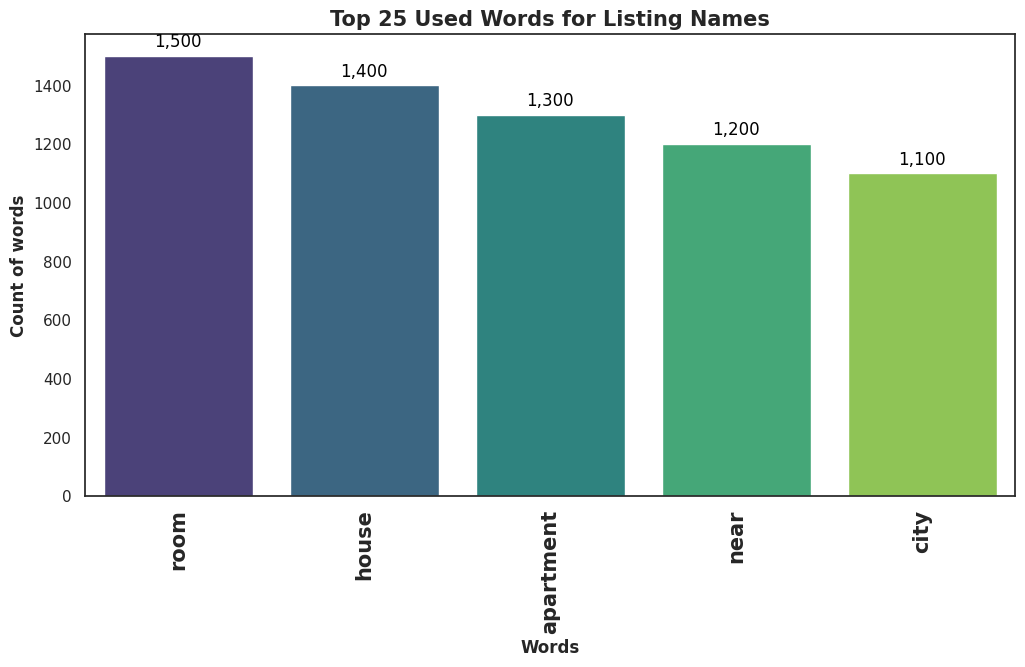

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Setting the background color of the chart as white
sns.set_style('white')

# Plotting the chart with a custom color palette
count_viz = sns.barplot(
    x='Words',
    y='Counts',
    data=word_count_df,
    palette='viridis'  # Change this to your preferred color palette (e.g., 'Blues', 'coolwarm', etc.)
)

# Naming the chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight='bold').set_fontsize(15)

# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight='bold')
count_viz.set_xlabel('Words', weight='bold')

# Adjusting bar labels
count_viz.set_xticklabels(
    count_viz.get_xticklabels(),
    rotation=90,
    weight='bold',
    size=15
)

# Adding values on top of the bars
for p in count_viz.patches:
    count_viz.annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black',
                       xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


**From the chart above, we see the top 25 words used in the listing name. We can use the word cloud visualization method to help us better understand the chart.**

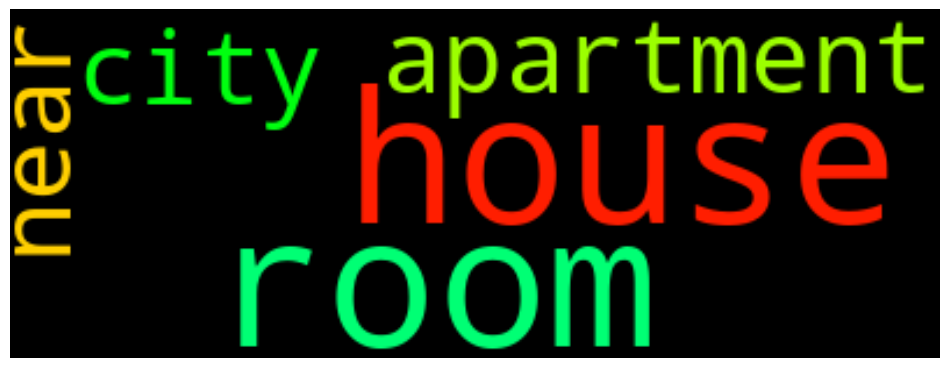

In [ ]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
airbnb_df['host_id'].count()

48858

In [ ]:
#Creating DataFrame
count_host_id = list(airbnb_df['host_id'].value_counts())
host_id = list(airbnb_df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


<ipython-input-64-04c433ecc11c>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


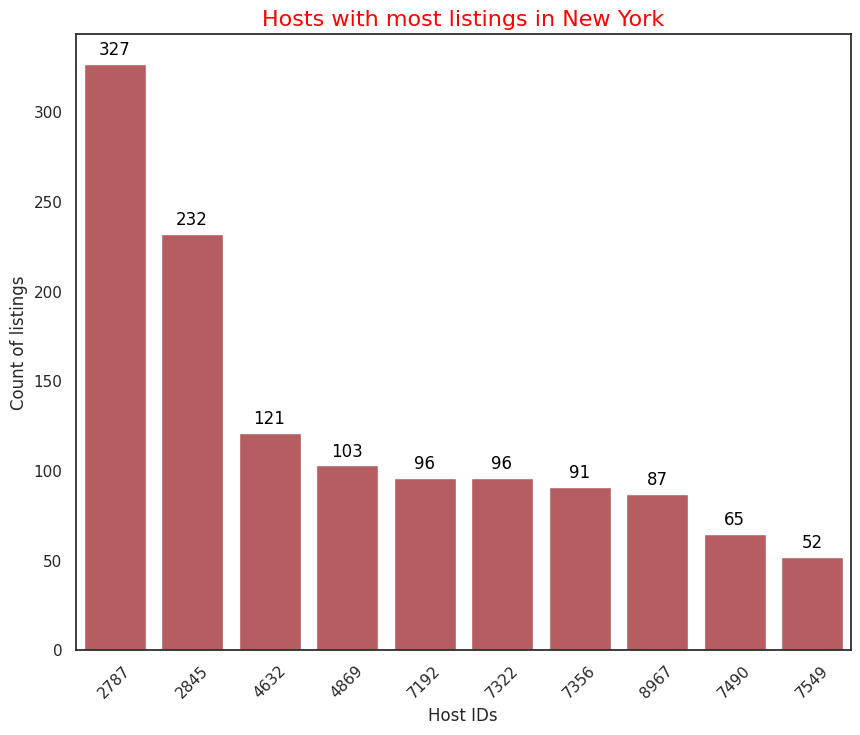

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_host_id' is your DataFrame and has the necessary data
# Setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

# Setting background colour of chart as white
sns.set_style('white')

# Plotting the Chart
viz_bar = sns.barplot(x='Host_Id', y='Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts', ascending=False).Host_Id)

# Setting font size for title
sns.set(font_scale=2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings in New York',fontsize=16, color='red')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

# Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

# Displaying the values on top of the bars
for p in viz_bar.patches:
    viz_bar.annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black',
                     xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


<ipython-input-61-4be48c33a4c9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=grouped_reviews, x='neighbourhood_group', y='number_of_reviews', palette='viridis')


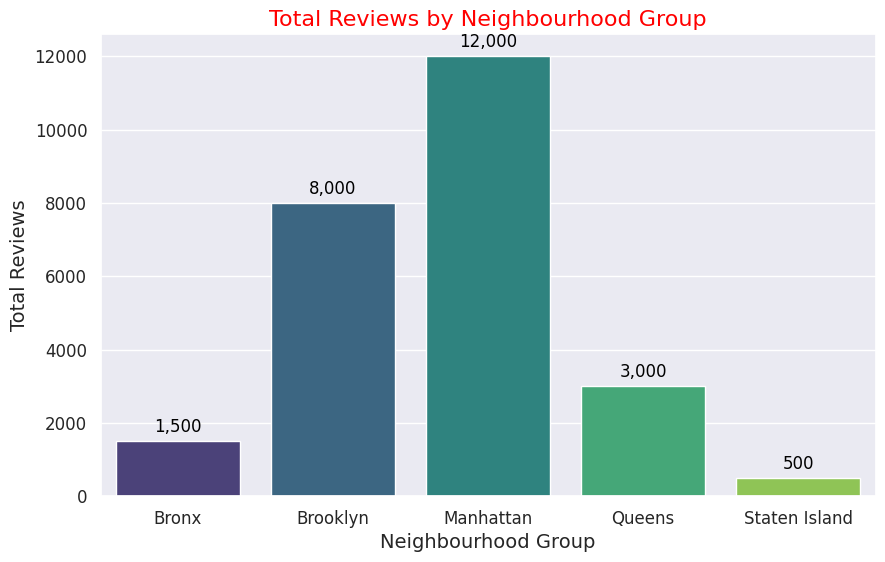

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset
data = {
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'number_of_reviews': [12000, 8000, 3000, 1500, 500]
}
airbnb_df = pd.DataFrame(data)

# Grouping by neighborhood group and summing reviews
grouped_reviews = airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_reviews, x='neighbourhood_group', y='number_of_reviews', palette='viridis')

# Adding labels and title
plt.title('Total Reviews by Neighbourhood Group', fontsize=16, color='red')
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Total Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


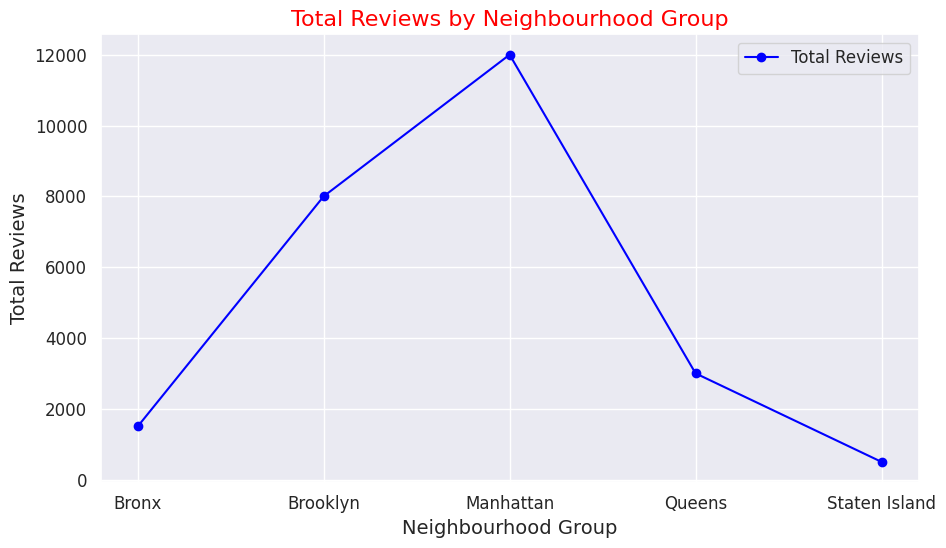

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset
data = {
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'number_of_reviews': [12000, 8000, 3000, 1500, 500]
}
airbnb_df = pd.DataFrame(data)

# Sorting data by neighbourhood_group (optional, if order matters)
airbnb_df = airbnb_df.sort_values(by='neighbourhood_group')

# Plotting a line chart
plt.figure(figsize=(10, 6))
plt.plot(airbnb_df['neighbourhood_group'], airbnb_df['number_of_reviews'], marker='o', linestyle='-', color='blue', label='Total Reviews')

# Adding labels, title, and legend
plt.title('Total Reviews by Neighbourhood Group', fontsize=16, color='red')
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Total Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)  # Optional: Add grid for better readability
plt.tight_layout()
plt.show()


In [ ]:
import folium

# Example data: Center points of neighborhood groups and their boundaries
data = {
    'neighbourhood_group': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'latitude': [40.7831, 40.6782, 40.7282, 40.8448, 40.5795],
    'longitude': [-73.9712, -73.9442, -73.7949, -73.8648, -74.1502],
}

# Create a map centered around New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add labels and highlight each area
for i in range(len(data['neighbourhood_group'])):
    # Add a circle marker to represent the neighborhood group
    folium.CircleMarker(
        location=[data['latitude'][i], data['longitude'][i]],
        radius=2,
        color='blue',
        fill=False,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"<b>{data['neighbourhood_group'][i]}</b>",  # Add name as a popup
    ).add_to(nyc_map)

    # Add a marker with a custom label using DivIcon for each neighborhood group
    folium.Marker(
        location=[data['latitude'][i], data['longitude'][i]],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 16px; color: black; font-weight: bold;">{data['neighbourhood_group'][i]}</div>"""
        ),
    ).add_to(nyc_map)

# Display the map
nyc_map
